### Проект: Линейные модели в машинном обучении

#### Описание проекта
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок,\
чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».\
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике,\
и при этом ему нужно выполнять свой план развития молочного хозяйства.\ Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год,\
а её надой был вкусным — строго по его критериям, ничуть не хуже.\
А продавцы и технологи так и норовят приукрасить своих коровок!\
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке.\
«ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:\
Первая будет прогнозировать возможный удой коровы;\
Вторая — рассчитывать вероятность получить вкусное молоко от коровы.\
С помощью модели нужно отобрать коров по двум критериям:\
средний удой за год — не менее 6000 килограммов;\
молоко должно быть вкусным.

#### Описание данных

1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
2. Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

1. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

1. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
2. Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. 
- Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Отсутствуют целевые признаки Удой, кг и Вкус молока.

План работы:
- Шаг 1. Загрузка и изучение данных;
- Шаг 2. Предобработка данных;
- Шаг 3. Исследовательский анализ данных;
- Шаг 4. Корреляционный анализ признаков в датасете ferma_main.csv;
- Шаг 5. Задача регрессии;
- Шаг 6. Задача классификации;
- Щаг 7. Итоговый вывод.

### Шаг 1. Загрузка и изучение данных;

Загрузка библиотек

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
!{sys.executable} -m pip install statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve

Чтение датафреймов

In [2]:
#ferma_main = pd.read_csv('ferma_main.csv', sep=';', decimal=",", thousands=".")
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=",", thousands=".")
#ferma_dad = pd.read_csv('ferma_dad.csv', sep=';', decimal=",", thousands=".")
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=",", thousands=".")
#cow_buy = pd.read_csv('cow_buy.csv', sep=';', decimal=",", thousands=".")
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=",", thousands=".")

#### Блок функций

Функция для обзора таблиц

In [3]:
def inform(data):
    # Вывод информации о датасете
    print("Информация о датасете:")
    print(data.info())
    
    # Разделительная строка
    print("\n" + "="*50 + "\n")
    
    # Вывод первых нескольких строк датасета
    print("Первые несколько строк датасета:")
    display(data.head())
      
    
    

функция для графиков

In [4]:
def visualize_data(data, cols):
    num_plots = len(cols)
    fig, ax = plt.subplots(num_plots, 2, figsize=(15, 5*num_plots))

    for i, col in enumerate(cols):
        sns.histplot(data[col], kde=False, ax=ax[i][0])
        ax[i][0].set_title(f'Гистограмма столбца {col}')

        sns.boxplot(x=data[col], ax=ax[i][1])
        ax[i][1].set_title(f'Ящик с усами столбца {col}')

    plt.tight_layout()
    plt.show()

In [5]:
inform(ferma_main)

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [6]:
inform(ferma_dad)

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


Первые несколько строк датасета:


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
inform(cow_buy)

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
None


Первые несколько строк датасета:


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Промежуточный вывод:** как мы можем видеть, предоставленные нам данные отличаются от ранее обрабатываемых нами тем, что у нас не один датасет (+ несколько справочников), а два связанных с данными другого по одним значениям и разнящиеся по другим по причине временных рамок, в процессе предобработки нам понадобится удалить неявные дубли, преобразовать некоторые из названий столбцов в простой вид, а так же проверить на наличие пропусков. 

In [8]:
ferma_main = ferma_main.rename(columns={
    'ЭКЕ (Энергетическая кормовая единица)': 'ЭКЕ',
    'СПО (Сахаро-протеиновое соотношение)': 'СПО',
    'Удой, кг' : 'Удой',
    'Сырой протеин, г':'Протеин',
    'Тип пастбища':'Тип_пастбища',
    'порода папы_быка':'Порода_папы_быка',
    'Жирность,%':'Жирность',
    'Белок,%':'Белок',
    'Вкус молока':'Вкус_молока'
})
ferma_main.head(1)

,id,Удой,ЭКЕ,Протеин,СПО,Порода,Тип_пастбища,Порода_папы_быка,Жирность,Белок,Вкус_молока,Возраст
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет


In [9]:
ferma_dad = ferma_dad.rename(columns={
    'Имя Папы': 'Имя_папы',
})
ferma_dad.head(0)

,id,Имя_папы


In [10]:
cow_buy = cow_buy.rename(columns={
    'Тип пастбища': 'Тип_пастбища',
    'порода папы_быка':'Порода_папы_быка',
    'Имя_папы':'Имя_папы',
    'Текущая_жирность,%':'Жирность',
    'Текущий_уровень_белок,%':'Белок'
})
cow_buy.head(0)

,Порода,Тип_пастбища,Порода_папы_быка,Имя_папы,Жирность,Белок,Возраст


### Шаг 2. Предобработка данных;

#### Проверка на пропуски

In [11]:
ferma_main.isna().sum()

id                  0
Удой                0
ЭКЕ                 0
Протеин             0
СПО                 0
Порода              0
Тип_пастбища        0
Порода_папы_быка    0
Жирность            0
Белок               0
Вкус_молока         0
Возраст             0
dtype: int64

In [12]:
ferma_dad.isna().sum()

id          0
Имя_папы    0
dtype: int64

In [13]:
cow_buy.isna().sum()

Порода              0
Тип_пастбища        0
Порода_папы_быка    0
Имя_папы            0
Жирность            0
Белок               0
Возраст             0
dtype: int64

#### Проверка на дубликаты

In [14]:
ferma_main = ferma_main.drop_duplicates()
ferma_main.duplicated().sum()

0

In [15]:
ferma_dad.duplicated().sum()

0

In [16]:
cow_buy = cow_buy.drop_duplicates()
cow_buy.duplicated().sum()


0

In [17]:
ferma_main[['Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Вкус_молока', 'Возраст']].apply(lambda x: x.unique())

Порода              [Вис Бик Айдиал, РефлешнСоверинг]
Тип_пастбища        [Равнинное, Равнинные, Холмистое]
Порода_папы_быка           [Айдиал, Соверин, Айдиалл]
Вкус_молока                       [вкусно, не вкусно]
Возраст                    [более_2_лет, менее_2_лет]
dtype: object

In [18]:
ferma_main.loc[ferma_main['Тип_пастбища'] == 'Равнинное', 'Тип_пастбища'] = 'равнинное'
ferma_main.loc[ferma_main['Тип_пастбища'] == 'Холмистое', 'Тип_пастбища'] = 'холмистое'
ferma_main.loc[ferma_main['Порода_папы_быка'] == 'Айдиалл', 'Порода_папы_быка'] = 'Айдиал'

ferma_main[['Удой', 'ЭКЕ', 'Протеин', 'СПО', 'Жирность', 'Белок']] = ferma_main[['Удой', 'ЭКЕ', 'Протеин', 'СПО', 'Жирность', 'Белок']].replace(',', '.', regex=True).astype('float')

In [19]:
ferma_dad['Имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [20]:
cow_buy[['Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Имя_папы', 'Возраст']].apply(lambda x: x.unique())

Порода                [Вис Бик Айдиал, РефлешнСоверинг]
Тип_пастбища                     [холмистое, равнинное]
Порода_папы_быка                      [Айдиал, Соверин]
Имя_папы            [Геркулес, Буйный, Барин, Соловчик]
Возраст                      [более_2_лет, менее_2_лет]
dtype: object

**Промежуточный вывод**: таким образом мы выяснили, что в датасетах нет пропусков, а так же избавились от неявных дубликатов в датасете ferma_main.

### Шаг 3. Исследовательский анализ данных

### Cтатистический анализ всех признаков.

##### ferma_main

In [21]:
print("Статистика по числовым данным:")
display(ferma_main.drop('id', axis=1).describe())

Статистика по числовым данным:


,Удой,ЭКЕ,Протеин,СПО,Жирность,Белок
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


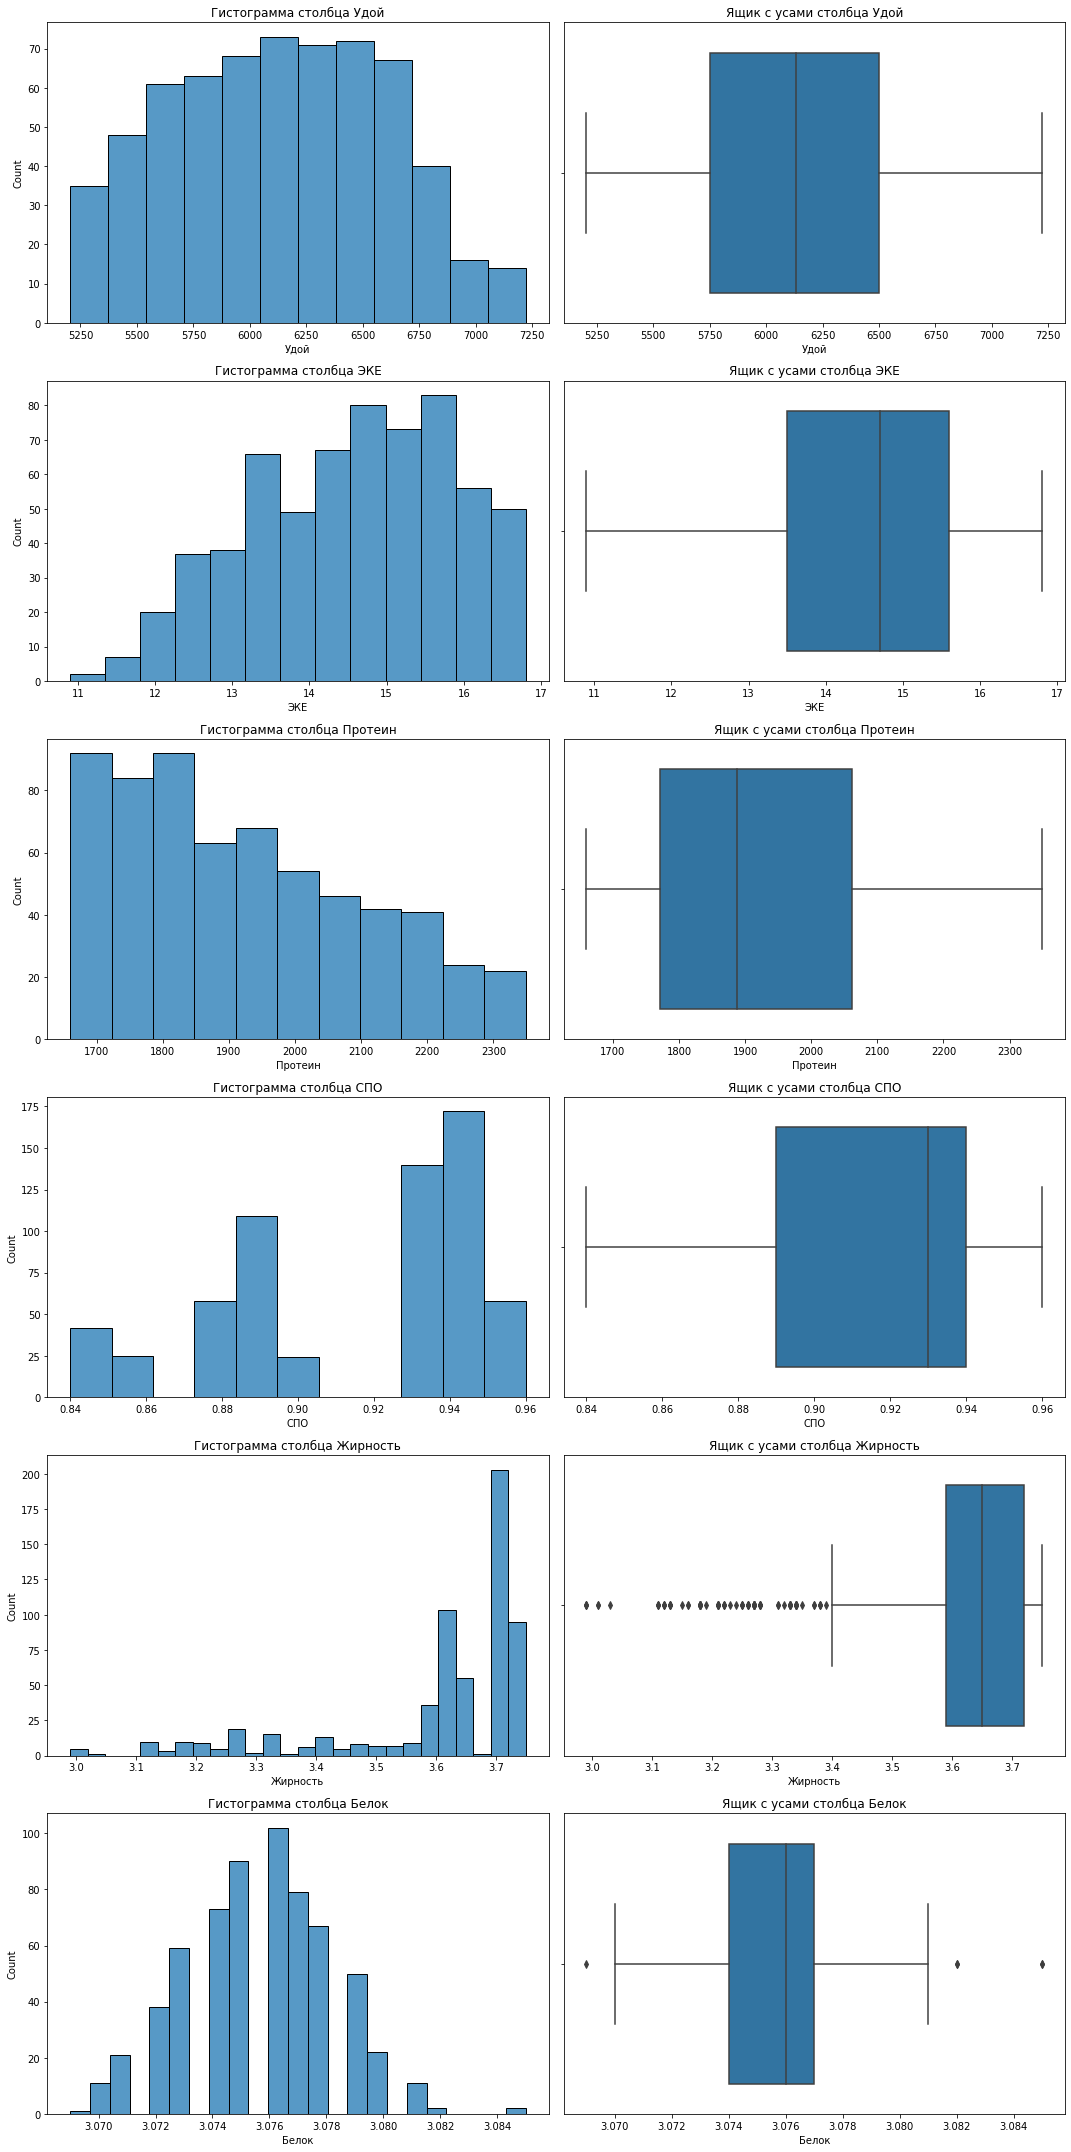

In [22]:
ferma_main = ferma_main[ferma_main['Удой'] <= 40000]
cols_to_visualize = ['Удой', 'ЭКЕ', 'Протеин', 'СПО', 'Жирность', 'Белок']
visualize_data(ferma_main, cols_to_visualize)

**Промежуточный вывод**: как мы видим, графики для удоя, протеина и СПО равномерны и не имеют выбросов, в то время как графики для жирности демонстрирует, что все значения менее 3.4 - выбросы, а график белка отсекает таким же образом все значения менее 3.07 и выше 3.81, но, поскольку количество подобных значений минимально и не наблюдается сильное отклонение в значениях, я не вижу смысла их удалять.

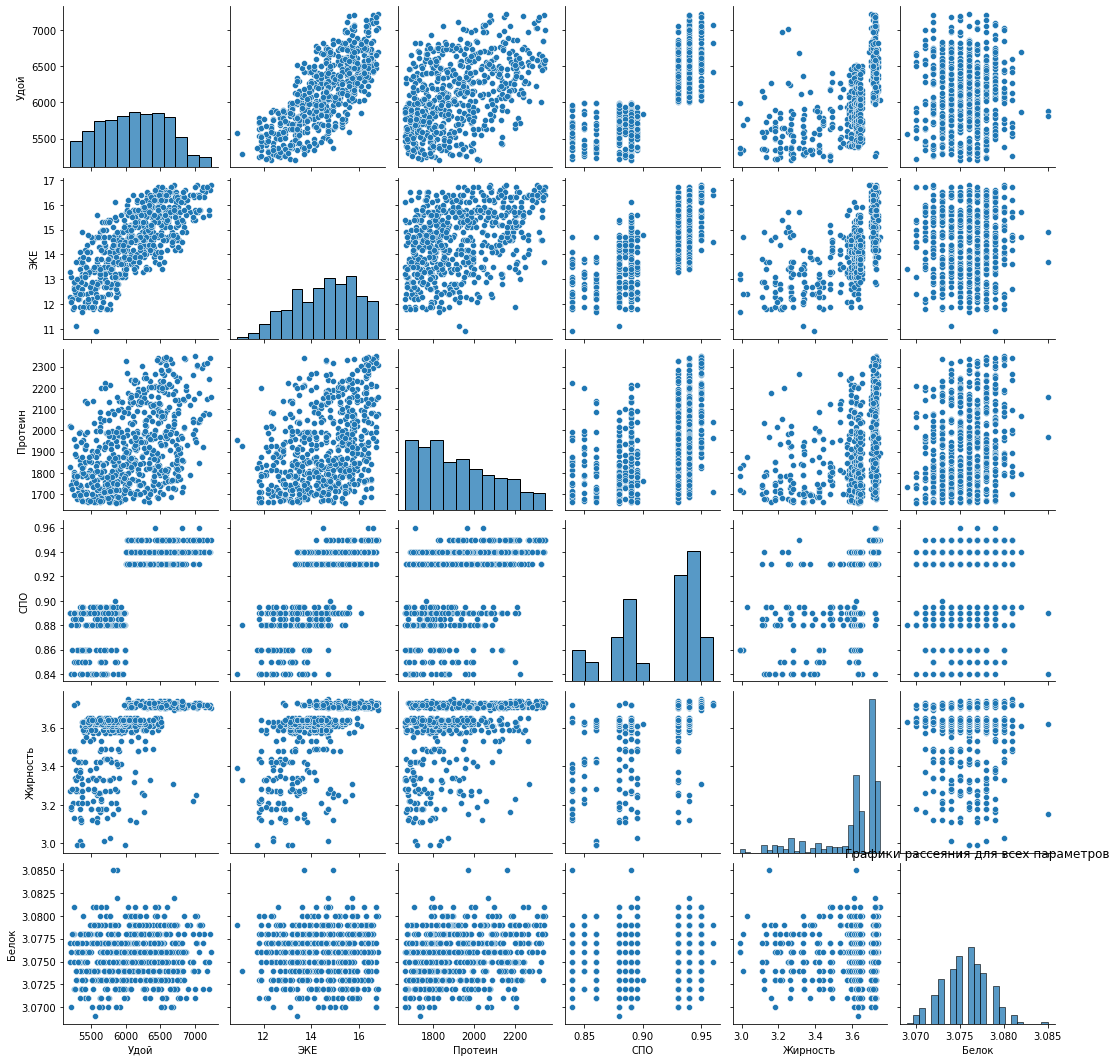

In [23]:
cat_fm = ferma_main[['Удой', 'ЭКЕ', 'Протеин', 'СПО', 'Жирность', 'Белок']]
sns.pairplot(cat_fm)
plt.title('Графики рассеяния для всех параметров')
plt.show()

**Промежуточный вывод**: в результате вышеописанных действий мы избавились от выбросов, неявных дубликатов и возможных проблем\
с преобразованиями в числовой формат в датасете ferma_main, а так же графически предоставили зависимость удоя от остальных признаков.

#### ferma_dad

In [24]:
print("Статистика по числовым данным:")
display(ferma_dad.drop('id', axis=1).describe())

Статистика по числовым данным:


,Имя_папы
count,629
unique,4
top,Барин
freq,240


**Промежуточный вывод**: как мы видим, бык по кличке Барин - самый производительный, другие методы статистического анализа проводить нет смысла, поскольку этот датафрейм - справочник

cow_buy

In [25]:
print("Статистика по числовым данным:")
display(cow_buy.describe())

Статистика по числовым данным:


,Жирность,Белок
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


Графики

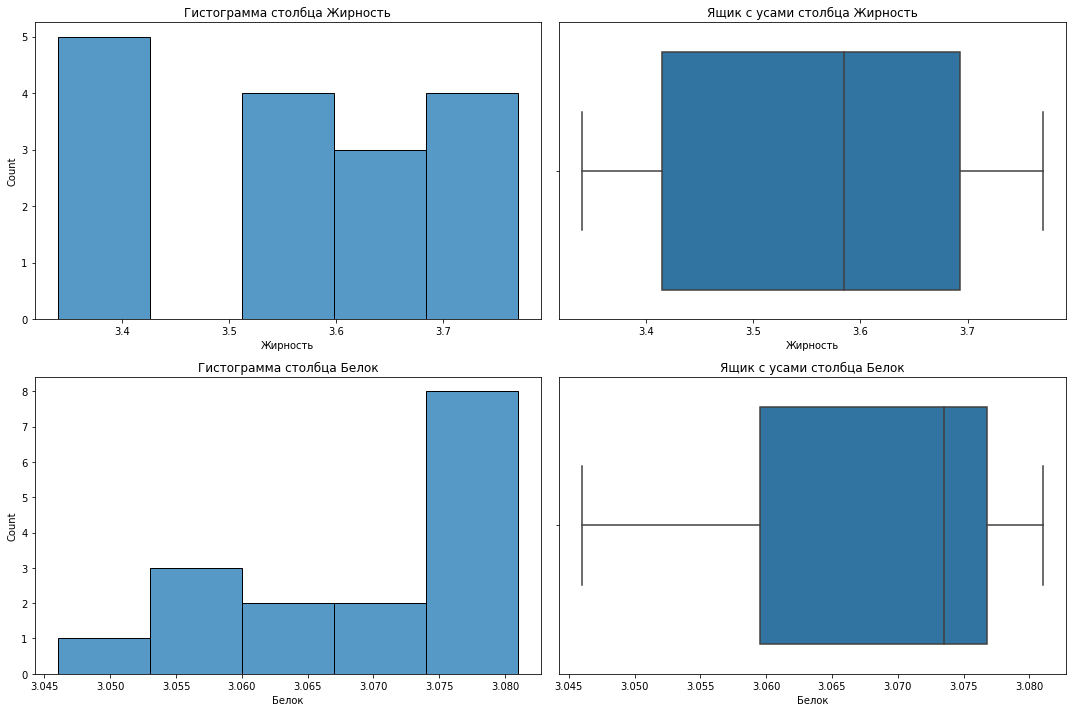

In [26]:
cols_to_visualize = ['Жирность', 'Белок']
visualize_data(cow_buy, cols_to_visualize)

**Промежуточный вывод**: произведена предобработка, аналогично  ferma_main и выяснены наиболее производительные условия для произвоздства лучших коров и, соответственно, молока в разрезе продаваемых коров.
Графики в свою очередь продемострировали отсутствие выбросов, что больше связано с размером выборки, чем сточностью данных.

### Шаг 4. Корреляционный анализ признаков в датасете ferma_main.csv

#### Коэффициенты корреляции 
1. Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.

Расчёт коэффициентов корреляции: Для начала рассчитаем коэффициенты корреляции между всеми признаками в датасете ferma_main.csv с использованием метода .corr() в библиотеке pandas.

Исходя из того, что в предыдущем блоке мы проверили и доказали отсутствие нормальности распределения данных и убрали выбросы, мы можем использовать расчёт по Спирмену.

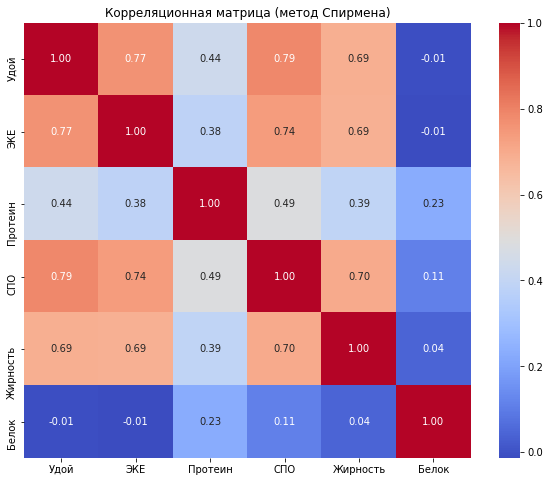

In [27]:
ferma_w_id = ferma_main.drop(columns='id')
correlation_matrix = ferma_w_id.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (метод Спирмена)')
plt.show()

**Промежуточный вывод**: как мы видим, удой зависит от ЭКЕ -> СПО -> Жирность -> Протеин и практически не зависит от белка.

#### Диаграмма рассеивания

Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.\
Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. \
Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.

Построение диаграмм рассеяния: Далее создадим диаграммы рассеяния (scatter plots) для признака "Удой, кг" и всех остальных количественных признаков.\
 Мы также учтем значение категориальных признаков, например, породы, путем окраски точек диаграммы в соответствии с этими категориями.

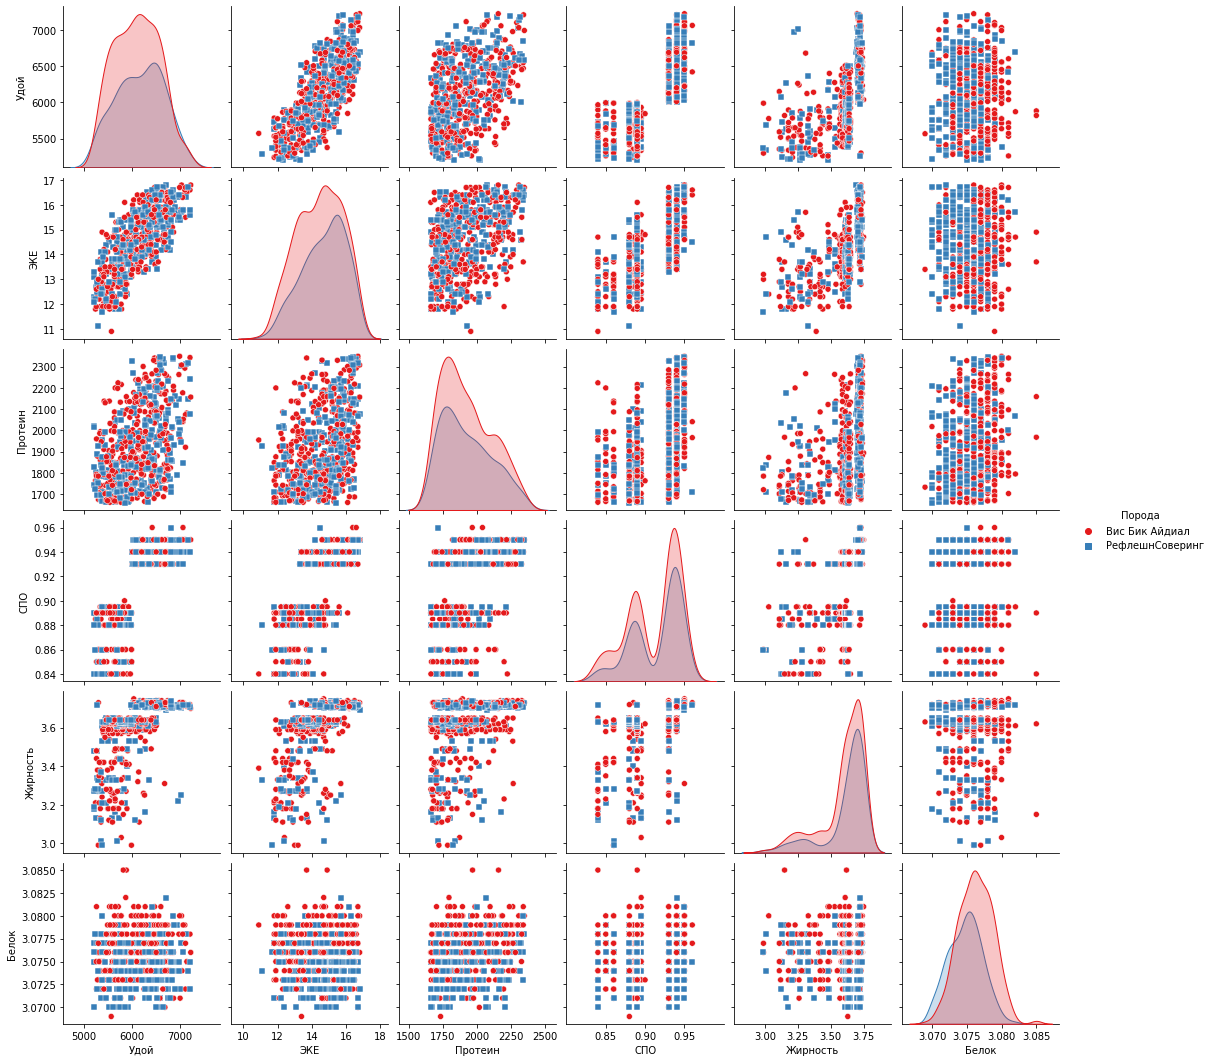

In [28]:
sns.pairplot(ferma_main.drop('id', axis=1), hue='Порода', markers=["o", "s"], palette='Set1')
plt.show()

#### Выводы о взаимосвязи признаков.
Какой тип взаимосвязи между целевым и входными признаками?\
Есть ли нелинейные связи между целевым и входными признаками?\
Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?\
Наблюдается ли мультиколлинеарность между входными признаками?

Выводы о взаимосвязи признаков: После анализа корреляционной матрицы и диаграмм рассеяния, мы можем сделать выводы о взаимосвязи признаков:\
подтвержена зависисмость между удоем и СПО, а так же менее явная связь между удоем и ЭКЕ и удоем и удоем и жирностью. 
Выявление подтвержденных или слабых линейных взаимосвязей между признаками:\
связь удоя с протеином и белком на обеих графических представлениях не линейная, и единственная линейная связь для белка - СПО. \
Связь удоя и СПО нелинейная, так же как и связь между удоем и ЭКЕ является нелинейной.\
Таким образом наличие нелинейных связей и необходимость введения дополнительных признаков требуют создание дополнительных признаков в модель для их учёта.\

Мультиколлинеарность между входными признаками: В нашем случае на основе корреляции пирсона мы видим, что она присутствует для ЭКЕ, СПО и Жирности, однако мы не можем вычислить мултиколлинеарность для всех признаков, что в конечном итоге потребует коррекции через отбор или создание новых признаков.

Таким образом мы систематически изучили взаимосвязи между признаками, определли типы связей и оценили необходимость введения дополнительных признаков в модель.

### Шаг 5. Задача регрессии

#### 5.1
- Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.\
- Используйте в качестве целевого признак Удой, кг.\
- Отберите признаки, которые подходят для модели линейной регрессии, аргументируйте выбор. \
- - Опирайтесь не только на наличие или отсутствие линейной связи между признаками, но и на \
причинно-следственные связи между удоем коров и группами признаков из описания датасета.\
- Разбейте данные на тренировочную и тестовую выборки.\
- Кодируйте категориальные признаки с помощью OneHotEncoder.\
- Масштабируйте количественные признаки с помощью StandardScaler.\
- Обучите модель линейной регрессии на подготовленных данных.\
- Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.\
- Оформите выводы, укажите:\
- - значение R² модели;\
- - какие выводы следуют из анализа остатков;\
- - нужны ли дополнительные исследования.

Возьмем в качестве гипотезу: Поскольку предыдущий анализ указал минимальность зависимости удоя от жирности и белка, не имеет смысла использовать их (и, соответственно вкус молока) в качестве признаков + мы всегда удаляем Id как недостоверный признак

Categorical Features: ['Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Возраст']
Numerical Features: ['ЭКЕ', 'Протеин', 'СПО']
Коэффициент детерминации (R²): 0.8015741709639204


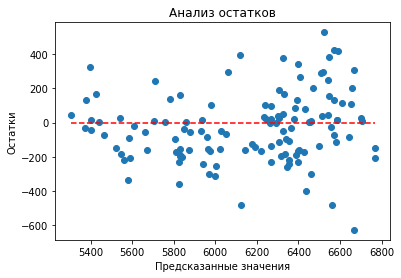

In [29]:
ferma = ferma_main.copy()
ferma = ferma.drop(columns=['id', 'Жирность','Белок', 'Вкус_молока'])
X = ferma.drop(columns=['Удой'], axis=1)
y = ferma['Удой']

# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Подготовка предобработки признаков
# Определим категориальные и количественные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Создание преобразовательных пайплайнов для категориальных и количественных признаков
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Объединение пайплайнов
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Создание пайплайна для модели линейной регрессии
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
model_pipeline.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model_pipeline.predict(X_test)

print("Categorical Features:", categorical_features)

print("Numerical Features:", numerical_features)
# Оценка качества модели на тестовой выборке
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R²):", r2)


# Анализ остатков
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Анализ остатков')
plt.show()

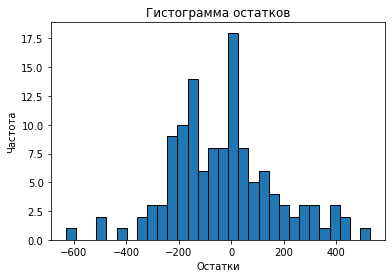

In [30]:
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.show()

**Промежуточный вывод**: на основе анализа остаткм мы видим, что точность модели соответствует 80%, а так же можно обратить внимания на значения ниже -600 и выше 400 как значения с наименьшей дисперсией.


#### 5.2
- Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.\
- Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно.\
- Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:\
- - Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера,\
причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, \
- преобразуйте СПО в категориальный бинарный признак, использовав эту границу.\
- - Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.\
- Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

Граница деления на два кластера: 0.9077115021998743


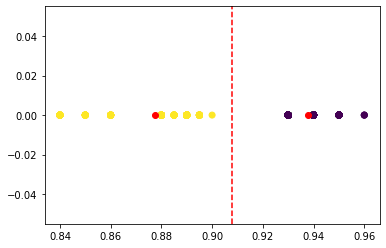

In [31]:
spo_data = ferma['СПО'].values.reshape(-1, 1)

# Определим два кластера с помощью K-средних
kmeans = KMeans(n_clusters=2, random_state=0).fit(spo_data)

kmeans_centers = kmeans.cluster_centers_

# Построим график с данными и центрами кластеров
plt.scatter(spo_data, np.zeros_like(spo_data), c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans_centers, [0, 0], c='r')

# Найдем координаты центров кластеров
center1 = kmeans_centers[0][0]
center2 = kmeans_centers[1][0]

# Вычислим границу деления на два кластера как среднее между центрами
border_value = (center1 + center2) / 2
print("Граница деления на два кластера:", border_value)

# Отобразим границу на графике
plt.axvline(x=border_value, color='r', linestyle='--')
plt.show()

Как мы видим по графику, взятие граничного значение для СПО=0.9091893308641219 будет нашим выбором

Categorical Features: ['СПО', 'Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Возраст']
Numerical Features: ['ЭКЕ', 'Протеин']
Коэффициент детерминации (R²) для обновленной модели: 0.8202047944008432


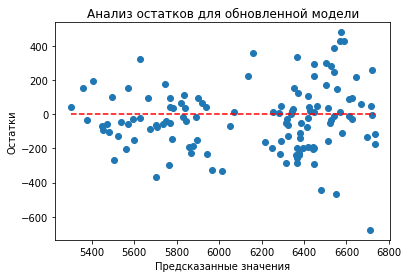

In [32]:
# 1. Преобразуем СПО в категориальный бинарный признак, используя заданное значение в качестве границы
ferma_main_2 = pd.DataFrame(ferma)
border_value = 0.9091893308641219  # Принимаем заданное значение в качестве границы для преобразования в категориальный бинарный признак
ferma_main_2['СПО'] = (ferma['СПО'] > border_value).astype(object)  # Преобразуем СПО в бинарный признак
# 2. Введем новый признак ЭКЕ в квадрате
ferma_main_2['ЭКЕ'] = ferma['ЭКЕ'] ** 2  # Создадим новый признак ЭКЕ в квадрате
# Разделение данных на целевой признак и признаки
X_updated = ferma_main_2.drop(columns=['Удой'], axis=1)  # Обновленный набор признаков
y_updated = ferma_main_2['Удой']
# Разбиение данных на тренировочную и тестовую выборки
X_train_upd, X_test_upd, y_train_upd, y_test_upd = train_test_split(X_updated, y_updated, test_size=0.2, random_state=42)


# Подготовка предобработки признаков
# Определим категориальные и количественные признаки
categorical_features_upd = X_updated.select_dtypes(include=['object']).columns.tolist()
numerical_features_upd = X_updated.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Создание преобразовательных пайплайнов для категориальных и количественных признаков
categorical_pipeline_upd = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

numerical_pipeline_upd = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Объединение пайплайнов
preprocessor_upd = ColumnTransformer(transformers=[
    ('num', numerical_pipeline_upd, numerical_features_upd),
    ('cat', categorical_pipeline_upd, categorical_features_upd) 
])

# Создание пайплайна для модели линейной регрессии на обновленных данных
model_pipeline_updated = Pipeline(steps=[
    ('preprocessor', preprocessor_upd),
    ('regressor', LinearRegression())
])

# Обучение модели на обновленных данных
model_pipeline_updated.fit(X_train_upd, y_train_upd)

# Предсказание на тестовых данных
y_pred_upd = model_pipeline_updated.predict(X_test_upd)

print("Categorical Features:", categorical_features_upd)

print("Numerical Features:", numerical_features_upd)
# Оценка качества модели на тестовой выборке
r2_upd = r2_score(y_test_upd, y_pred_upd)
print("Коэффициент детерминации (R²) для обновленной модели:", r2_upd)

# Анализ остатков для обновленной модели
residuals_upd = y_test_upd - y_pred_upd
plt.scatter(y_pred_upd, residuals_upd)
plt.hlines(y=0, xmin=y_pred_upd.min(), xmax=y_pred_upd.max(), colors='r', linestyles='dashed')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Анализ остатков для обновленной модели')
plt.show()


**Промежуточный вывод**: на основе анализа остаткм мы видим, что точность модели соответствует 82%, и разброс (за исключением значений <-600) сократился следовательно нам удалось повысить качество модели посредством устранения нелинейности

#### 5.3

- Добавьте в данные новый признак и обучите на них третью модель LinearRegression.\
- Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.\
- Устраните нелинейность между признаками.\
- Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

Рассмотрим следующую теорию-  Извлечение квадратного корня уменьшает влияние экстремальных значений, так как квадратный корень возрастает медленнее, чем исходная переменная. Это может сделать модель более устойчивой к выбросам в данных - и применим её к данным протеина.

Коэффициент детерминации (R²) для модели на обновленных данных: 0.8303990046530435


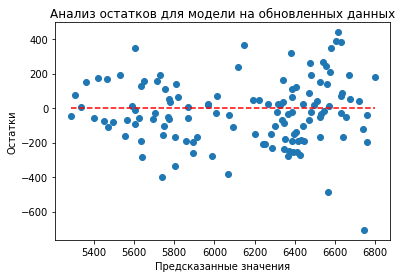

In [33]:
ferma_main_2['id'] = ferma_main['id']
# Соединение данных из файлов ferma_main.csv и ferma_dad.csv по ключу
merged_data = pd.merge(ferma_main_2, ferma_dad, on='id') 
merged_data = merged_data.drop(columns=['id'])
# Устранение нелинейности между признаками
# Выполним нелинейное преобразование признаков, используя numpy
merged_data['Протеин'] = np.sqrt(merged_data['Протеин'])  # устранение нелинейности путем извлечения квадратного корня

# Подготовка новых данных с добавленным признаком и обучение третьей модели LinearRegression
X_new = merged_data.drop('Удой', axis=1) 
y_new = merged_data['Удой']

# Разбиение данных на тренировочную и тестовую выборки
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Подготовка предобработки признаков
# Определим категориальные и количественные признаки
categorical_features_new = X_new.select_dtypes(include=['object']).columns.tolist()
numerical_features_new = X_new.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Создание преобразовательных пайплайнов для категориальных и количественных признаков
categorical_pipeline_new = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

numerical_pipeline_new = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Объединение пайплайнов
preprocessor_new = ColumnTransformer(transformers=[
    ('num', numerical_pipeline_new, numerical_features_new),
    ('cat', categorical_pipeline_new, categorical_features_new)
])

# Создание пайплайна для третьей модели LinearRegression на обновленных данных
model_pipeline_new = Pipeline(steps=[
    ('preprocessor', preprocessor_new),
    ('regressor', LinearRegression())
])

# Обучение третьей модели на обновленных данных
model_pipeline_new.fit(X_train_new, y_train_new)

# Предсказание на тестовых данных
y_pred_new = model_pipeline_new.predict(X_test_new)

# Оценка качества модели на тестовой выборке
r2_new = r2_score(y_test_new, y_pred_new)
print("Коэффициент детерминации (R²) для модели на обновленных данных:", r2_new)

# Анализ остатков для третьей модели
residuals_new = y_test_new - y_pred_new
plt.scatter(y_pred_new, residuals_new)
plt.hlines(y=0, xmin=y_pred_new.min(), xmax=y_pred_new.max(), colors='r', linestyles='dashed')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Анализ остатков для модели на обновленных данных')
plt.show()

**Промежуточный вывод**: на основе анализа остаткм мы видим, что точность модели соответствует 83%, данные более сгруппированные и наше предположении о изменении протеина оправдало себя.

#### 5.4

Таким образом:
Модель №1 продемонстрировала коэффициент детерминации R² = 0.8015741709639204, что указывает на то, что примерно 80.5% изменчивости зависимой переменной объяснены независимыми переменными в модели. Анализ остатков предполагает, что они сосредоточены в основном вокруг нуля без выраженных паттернов, что свидетельствует о том, что модель хорошо объясняет изменчивость данных.

Модель №2 показала R² = 0.8202047944008432, что можно считать лучшим, чем у первой модели. Анализ остатков говорит о том, что они также сосредоточены в основном вокруг нуля, но наблюдается меньшая дисперсия значений, по сравнению с первой моделью.

Модель №3 показала R² = 0.8303990046530435. Анализ остатков указывает на равномерное распределение вокруг нуля с несколькими значительными систематическими отклонениями, но в целом данная модель обладает наибольшим коэффициентом детерминации и наименьшими степенями отклонения от среднего значения.

На основании этой информации, модель №3 демонстрирует наилучшее качество, за ней следует модель №2, и наименее эффективной оказалась модель №1.

#### 5.5

- Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. 
- Используйте функции для расчёта метрик. 
- Укажите лучшую модель;

In [34]:
# Расчет метрик для первой модели
mse_model1 = mean_squared_error(y_test, y_pred)
mae_model1 = mean_absolute_error(y_test, y_pred)
rmse_model1 = np.sqrt(mse_model1)

# Расчет метрик для второй модели
mse_model2 = mean_squared_error(y_test, y_pred_upd)
mae_model2 = mean_absolute_error(y_test, y_pred_upd)
rmse_model2 = np.sqrt(mse_model2)

# Расчет метрик для третьей модели
mse_model3 = mean_squared_error(y_test_new, y_pred_new)
mae_model3 = mean_absolute_error(y_test_new, y_pred_new)
rmse_model3 = np.sqrt(mse_model3)

# Оценка качества каждой модели по трем метрикам
print("Метрики для первой модели:")
print("MSE:", mse_model1)
print("MAE:", mae_model1)
print("RMSE:", rmse_model1)
print("\nМетрики для второй модели:")
print("MSE:", mse_model2)
print("MAE:", mae_model2)
print("RMSE:", rmse_model2)
print("\nМетрики для третьей модели:")
print("MSE:", mse_model3)
print("MAE:", mae_model3)
print("RMSE:", rmse_model3)

Метрики для первой модели:
MSE: 41192.28748180402
MAE: 157.78954396959307
RMSE: 202.95883198768172

Метрики для второй модели:
MSE: 37324.65593248886
MAE: 147.81589115365136
RMSE: 193.19590040290416

Метрики для третьей модели:
MSE: 35208.38487343114
MAE: 145.55937605307136
RMSE: 187.63897482514432


Предоставленные метрики для каждой модели также подтверждают их качество, где модель №1 имеет наименьшие значения ошибок (MSE, MAE, RMSE), модель №2 - наибольшие значения, а модель №3 находится между ними.

Таким образом, наилучшей моделью, учитывая предоставленные метрики и анализ остатков, является модель №3, за ней следует модель №1, и наименее эффективной оказалась модель №2.

#### 5.6

- Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. 
- Используйте функции для расчёта метрик. 
- Укажите доверительный интервал прогноза лучшей модели.

Расчет стандартной ошибки

In [35]:
X3_numeric = X_test_new.select_dtypes(include=[np.number])

X3_const = sm.add_constant(X3_numeric)

model3_sm = sm.OLS(y_test_new, X3_const).fit()

se_model3 = model3_sm.mse_resid

Расчет доверительных интервалов

In [36]:
ci_model3 = model3_sm.get_prediction(X3_const).summary_frame(alpha=0.05)

print("\nДоверительные интервалы для прогнозов лучшей модели:")
display(ci_model3)


Доверительные интервалы для прогнозов лучшей модели:


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
581,5907.110119,35.118806,5837.594596,5976.625641,5299.240003,6514.980234
591,6608.468238,50.838563,6507.836419,6709.100057,5996.258770,7220.677706
550,5915.825326,33.381921,5849.747860,5981.902792,5308.338782,6523.311870
213,5751.341963,42.978540,5666.268578,5836.415348,5141.496778,6361.187149
485,6215.240324,57.089854,6102.234458,6328.246190,5600.875615,6829.605033
...,...,...,...,...,...,...
535,6032.029034,34.573848,5963.592221,6100.465846,5424.281334,6639.776734
319,6580.140702,65.311906,6450.859788,6709.421615,5962.575139,7197.706264
218,6355.052987,43.707055,6268.537552,6441.568423,5745.004965,6965.101010
344,6323.379921,40.919414,6242.382450,6404.377392,5714.089957,6932.669885


#### 5.7

С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. \
Данные о них находятся в датасете cow_buy.csv.\
Добавьте недостающие признаки ЭКЕ, \
Протеин и СПО: возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.\
Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.\
Получите прогноз удоя коров.

In [37]:
cow_buy_new = cow_buy.copy()
cow_buy_new = cow_buy_new.drop(columns=['Жирность', 'Белок'])
cow_buy_new['СПО'] = ferma_main['СПО']*1.05
border_value = 0.9091893308641219
cow_buy_new['СПО'] = (cow_buy_new['СПО'] > border_value).astype(object)
cow_buy_new['ЭКЕ'] = merged_data['ЭКЕ']*1.05
cow_buy_new['Протеин'] = merged_data['Протеин']*1.05
cow_buy_new = cow_buy_new.dropna().reset_index(drop=True)
desired_columns = ['ЭКЕ', 'Протеин', 'СПО', 'Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Возраст', 'Имя_папы']
cow_buy_new = cow_buy_new.reindex(columns=desired_columns)
X_buy = cow_buy_new

y_pred_buy = model_pipeline_new.predict(X_buy)

cow_buy_with_pred = cow_buy.copy()
cow_buy_with_pred['Удой'] = y_pred_buy

display(cow_buy_with_pred)

,Порода,Тип_пастбища,Порода_папы_быка,Имя_папы,Жирность,Белок,Возраст,Удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6494.108951
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6186.273440
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6184.105563
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6354.956875
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6239.577525
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6126.620285
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6506.643188
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6202.622769
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6156.100105
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6957.806687


**Вывод**: таким образом на основе нашей лучшей модели мы смогли сформировать прогноз удоя для выставленных на продажу коров

### Шаг 6. Задача классификации

Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.
- Используйте в качестве целевого признак Вкус молока.
- При необходимости преобразуйте имеющиеся или добавьте новые признаки.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью OneHotEncoder.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Обучите модель логистической регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
- Постройте матрицу ошибок.

In [38]:
ferma = ferma_main.copy()
ferma = ferma.drop(columns=['id','ЭКЕ','Протеин','СПО', 'Удой'])
ferma['Вкус_молока'] = ferma['Вкус_молока'].replace({'вкусно': 1, 'не вкусно': 0})

# Предобработка данных
# Преобразование категориальных признаков с помощью OneHotEncoder
# Масштабирование количественных признаков с помощью StandardScaler
# Разделение данных на тренировочную и тестовую выборки
X = ferma.drop('Вкус_молока', axis=1)
y = ferma['Вкус_молока']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
# Осуществляем кодирование категориальных признаков и масштабирование количественных признаков в одном конвейере
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['Жирность', 'Белок']), # количественные признаки
    ('cat', OneHotEncoder(), ['Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Возраст']) # категориальные признаки
])

# Создание конвейера, включающего предобработку данных и модель логистической регрессии
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Обучение модели
model = pipeline.fit(X_train, y_train)

# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.5634920634920635
Precision: 0.59
Recall: 0.8082191780821918
Confusion Matrix:
[[12 41]
 [14 59]]


Построение матрицы ошибок в виде тепловой карты

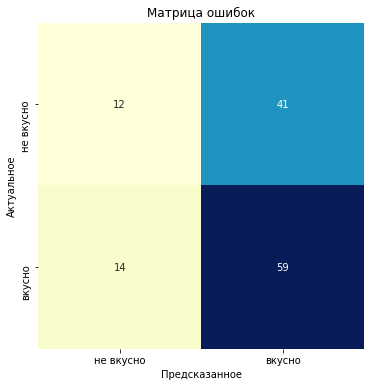

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='g', cbar=False, square=True, xticklabels=['не вкусно', 'вкусно'], yticklabels=['не вкусно', 'вкусно'])
plt.xlabel('Предсказанное')
plt.ylabel('Актуальное')
plt.title('Матрица ошибок')

plt.show()

На основании предоставленных метрик и матрицы ошибок для модели логистической регрессии, мы можем сделать следующие выводы:

- Precision (точность) составляет 0.59, что указывает на то, что из всех молок, которые модель предсказала как вкусные, действительно вкусными являются 59%.
- Recall (полнота) равна 0.808, что говорит нам о том, что модель правильно классифицировала 80.8% вкусного молока из всех действительно вкусных образцов молока.
- Матрица ошибок показывает, что у нас есть 12 ложноположительных предсказаний (молоко, которое модель предсказала как вкусное, когда оно на самом деле не вкусное) и 14 ложноотрицательных предсказаний (молоко, которое модель предсказала как не вкусное, когда оно на самом деле вкусное).

Возможные последующие шаги:
С учетом того, что главное для заказчика - вкусное молоко, критичнее всего минимизировать ложноположительные предсказания, то есть ошибочно считать не вкусное молоко за вкусное. Поэтому precision является более важной метрикой в данном контексте.

Для сведения к нулю критичной ошибки — ложноположительных предсказаний, мы можем уменьшить порог принадлежности к классу "вкусное молоко". Это позволит нам увеличить точность предсказаний за счет уменьшения ложноположительных результатов.

После изменения порога принадлежности к классам, значения метрик recall и precision пересчитываются. Оптимальное значение порога будет зависеть от баланса между ложноположительными и ложноотрицательными результатами. Начнем с уменьшения порога и последующей оценкой метрик.

Дальнейшие шаги включают анализ новых значений метрик после изменения порога, а также возможность дальнейшей настройки модели или выбор другого алгоритма классификации для достижения оптимальных результатов с учетом требований заказчика.

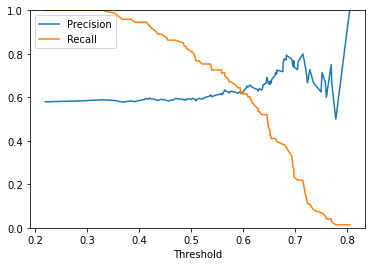

Лучшая точность: 0.8046963665427046
Следующая лучшая, после максимальной: 0.5345694100028654


0.5345694100028654

In [40]:
y_pred_proba = model.predict_proba(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])
plt.show()

best_threshold = thresholds[np.argmax(precisions == 1.0)]
print('Лучшая точность:',best_threshold)

idx = np.where((precisions[:-1] >= 0.6) & (precisions[:-1] > 0.0))[0]
threshold_with_max_recall = thresholds[idx[np.argmax(recalls[idx])]]
print('Следующая лучшая, после максимальной:',threshold_with_max_recall)
threshold_with_max_recall

Как мы видим, 0.8046963665427025 является лучшим пороговым значением для поиска 100% точности.
Но, поскольку данное  значение  слишком велико и не позволяет нам обнаружить "вкусное" молоко, я буду использовать 0.5345694100028576 для порога в cow_buy

Accuracy with new threshold: 0.42857142857142855
Precision with new threshold: 1.0
Recall with new threshold: 0.0136986301369863
Confusion Matrix with new threshold:
[[53  0]
 [72  1]]


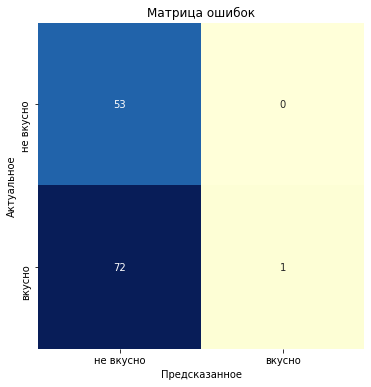

In [46]:
# Получение вероятностей принадлежности к классам
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Установка нового порога
new_threshold = 0.8046963665427025
new_threshold_buy = 0.5345694100028576
# Принятие решения на основе установленного порога
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

# Оценка качества модели с новым порогом
accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
precision_new_threshold = precision_score(y_test, y_pred_new_threshold, pos_label=1)
recall_new_threshold = recall_score(y_test, y_pred_new_threshold, pos_label=1)
conf_matrix_new_threshold = confusion_matrix(y_test, y_pred_new_threshold)

print(f'Accuracy with new threshold: {accuracy_new_threshold}')
print(f'Precision with new threshold: {precision_new_threshold}')
print(f'Recall with new threshold: {recall_new_threshold}')
print(f'Confusion Matrix with new threshold:\n{conf_matrix_new_threshold}')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_new_threshold, annot=True, cmap='YlGnBu', fmt='g', cbar=False, square=True, xticklabels=['не вкусно', 'вкусно'], yticklabels=['не вкусно', 'вкусно'])
plt.xlabel('Предсказанное')
plt.ylabel('Актуальное')
plt.title('Матрица ошибок')

plt.show()

Таким образом мы смогли избавиться от ложноположительных результатов и смогли довести точность оценки до 100%.

#### Прогноз вкуса

In [42]:
X_buy = cow_buy.drop(columns=['Имя_папы'])
y_pred_buy = (model.predict_proba(X_buy)[:, 1] >= new_threshold_buy).astype(int)

cow_buy_with_predictions = cow_buy.copy().reset_index(drop=True)
y_pred_buy_series = pd.Series(y_pred_buy)

y_pred_buy_series.replace({1: 'вкусно', 0: 'не вкусно'}, inplace=True)

cow_buy_with_predictions['Вкус_молока'] = y_pred_buy_series

display(cow_buy_with_predictions)

,Порода,Тип_пастбища,Порода_папы_быка,Имя_папы,Жирность,Белок,Возраст,Вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,не вкусно
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,вкусно
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,вкусно
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,не вкусно
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,не вкусно


**Вывод**: как мы видим, текущий способ расчета удоя на основе ferma_main позволил нам спрогнозировать вкус молока для продаваемых коров

### Шаг 7. Сделайте итоговые выводы

- Добавьте прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.
- Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
- Коротко опишите результаты работы моделей для фермера.
- Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
- Какие ещё рекомендации можно ему дать?
- Сделайте выводы о моделях линейной регрессии и логистической регрессии.
- Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
- Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
- Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

In [43]:
cow_buy_with_predictions['Удой'] = cow_buy_with_pred['Удой']
# Отбор коров с предсказанным удоем более 6000 кг в год и вкусным молоком
selected_cows = cow_buy_with_predictions[(cow_buy_with_predictions['Удой'] > 6000) & (cow_buy_with_predictions['Вкус_молока'] == 'вкусно')]
display(selected_cows)

,Порода,Тип_пастбища,Порода_папы_быка,Имя_папы,Жирность,Белок,Возраст,Вкус_молока,Удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,вкусно,6494.108951
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,вкусно,6186.273440
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,вкусно,6506.643188
13,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,вкусно,6056.825049


**Промежуточный вывод:** на основе выеописанного анализа из 16 выставленных на продажу фермер без риска сможет купить четыре, поскольку остальные не соответствуют заявленным требованиям.\
В качестве рекомендации советую добирать породу соверин - статистически у них более вкусное молоко.

 Описание результатов моделей для фермера\
 Результаты модели линейной регрессии:\
 Модель предсказала удой коров и добавила прогнозы в датафрейм с коровами для покупки.\
 Результаты модели логистической регрессии:\
 Модель предсказала вкус молока и добавила прогнозы в датафрейм с коровами.

В процессе создания логической регрессии был выявлен удой продаваемых коров. Выявленные данные позволили объяснить и систематизировать изменчивость данных, сгруппировав их вокруг нуля, демонстрируя малый процент отклонений.\
Регрессионная модель поспособствовала систематизации вкуса у коровьего молока - были выяснены границы, когда молоко характеризуется как вкусное и построена модель, отвечающая за систематизацию подобного.\
Разумееется, результаты можно улучшить, добавив разброс, позволяющий лучше характеризовать все возможные виды значений и сформировав модель, близкую к идеалу - для лучшего ориентира в будущем.

При анализе рисков или экономических расчетов важно учитывать не только точность модели, но и другие метрики, которые могут предоставить более полное представление о её производительности.\
Некоторые из ключевых метрик, которые следует учитывать при анализе моделей классификации, включая логистическую регрессию, в контексте рисков или экономических расчетов, включают в себя:

- Матрица ошибок (Confusion Matrix): Позволяет оценить производительность модели в терминах истинно положительных, ложноположительных, истинно отрицательных и ложно отрицательных предсказаний.
- Точность (Precision) и Полнота (Recall): Точность показывает, сколько предсказанных положительных случаев действительно являются положительными, в то время как полнота показывает, сколько из всех действительных положительных случаев было предсказано правильно.
- F-мера (F1-score): Сводная метрика, учитывающая как точность, так и полноту модели.
- ROC-кривая и площадь под ROC-кривой (AUC-ROC): Позволяют оценить производительность модели, основываясь на том, как хорошо она разделяет классы.
- Доход (Gain) и Информационное обогащение (Information Gain): Метрики, оценивающие экономическую эффективность модели в контексте конкретных бизнес-целей.
- При оценке модели в контексте рисков или экономических расчетов, важно выбирать метрики, которые наилучшим образом соответствуют конкретным потребностям бизнеса и учитывают влияние различных факторов на финансовый результат.


В процессе выполнения работы мы задействовали матрицу, точность, полноту и выборку метрик. Для будущего пользователя можно посоветовать задействовать в ТЗ больше методов анализа и предоставить большую выборку для анализа - та, что рассматривает заказчик при любом раскладе не может считаться чем то большим, чем тестовая.